In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the data
df = pd.read_csv("dataset.csv",index_col=False, parse_dates=[['day','month','year','hour']])
df.shape[:]

(43824, 10)

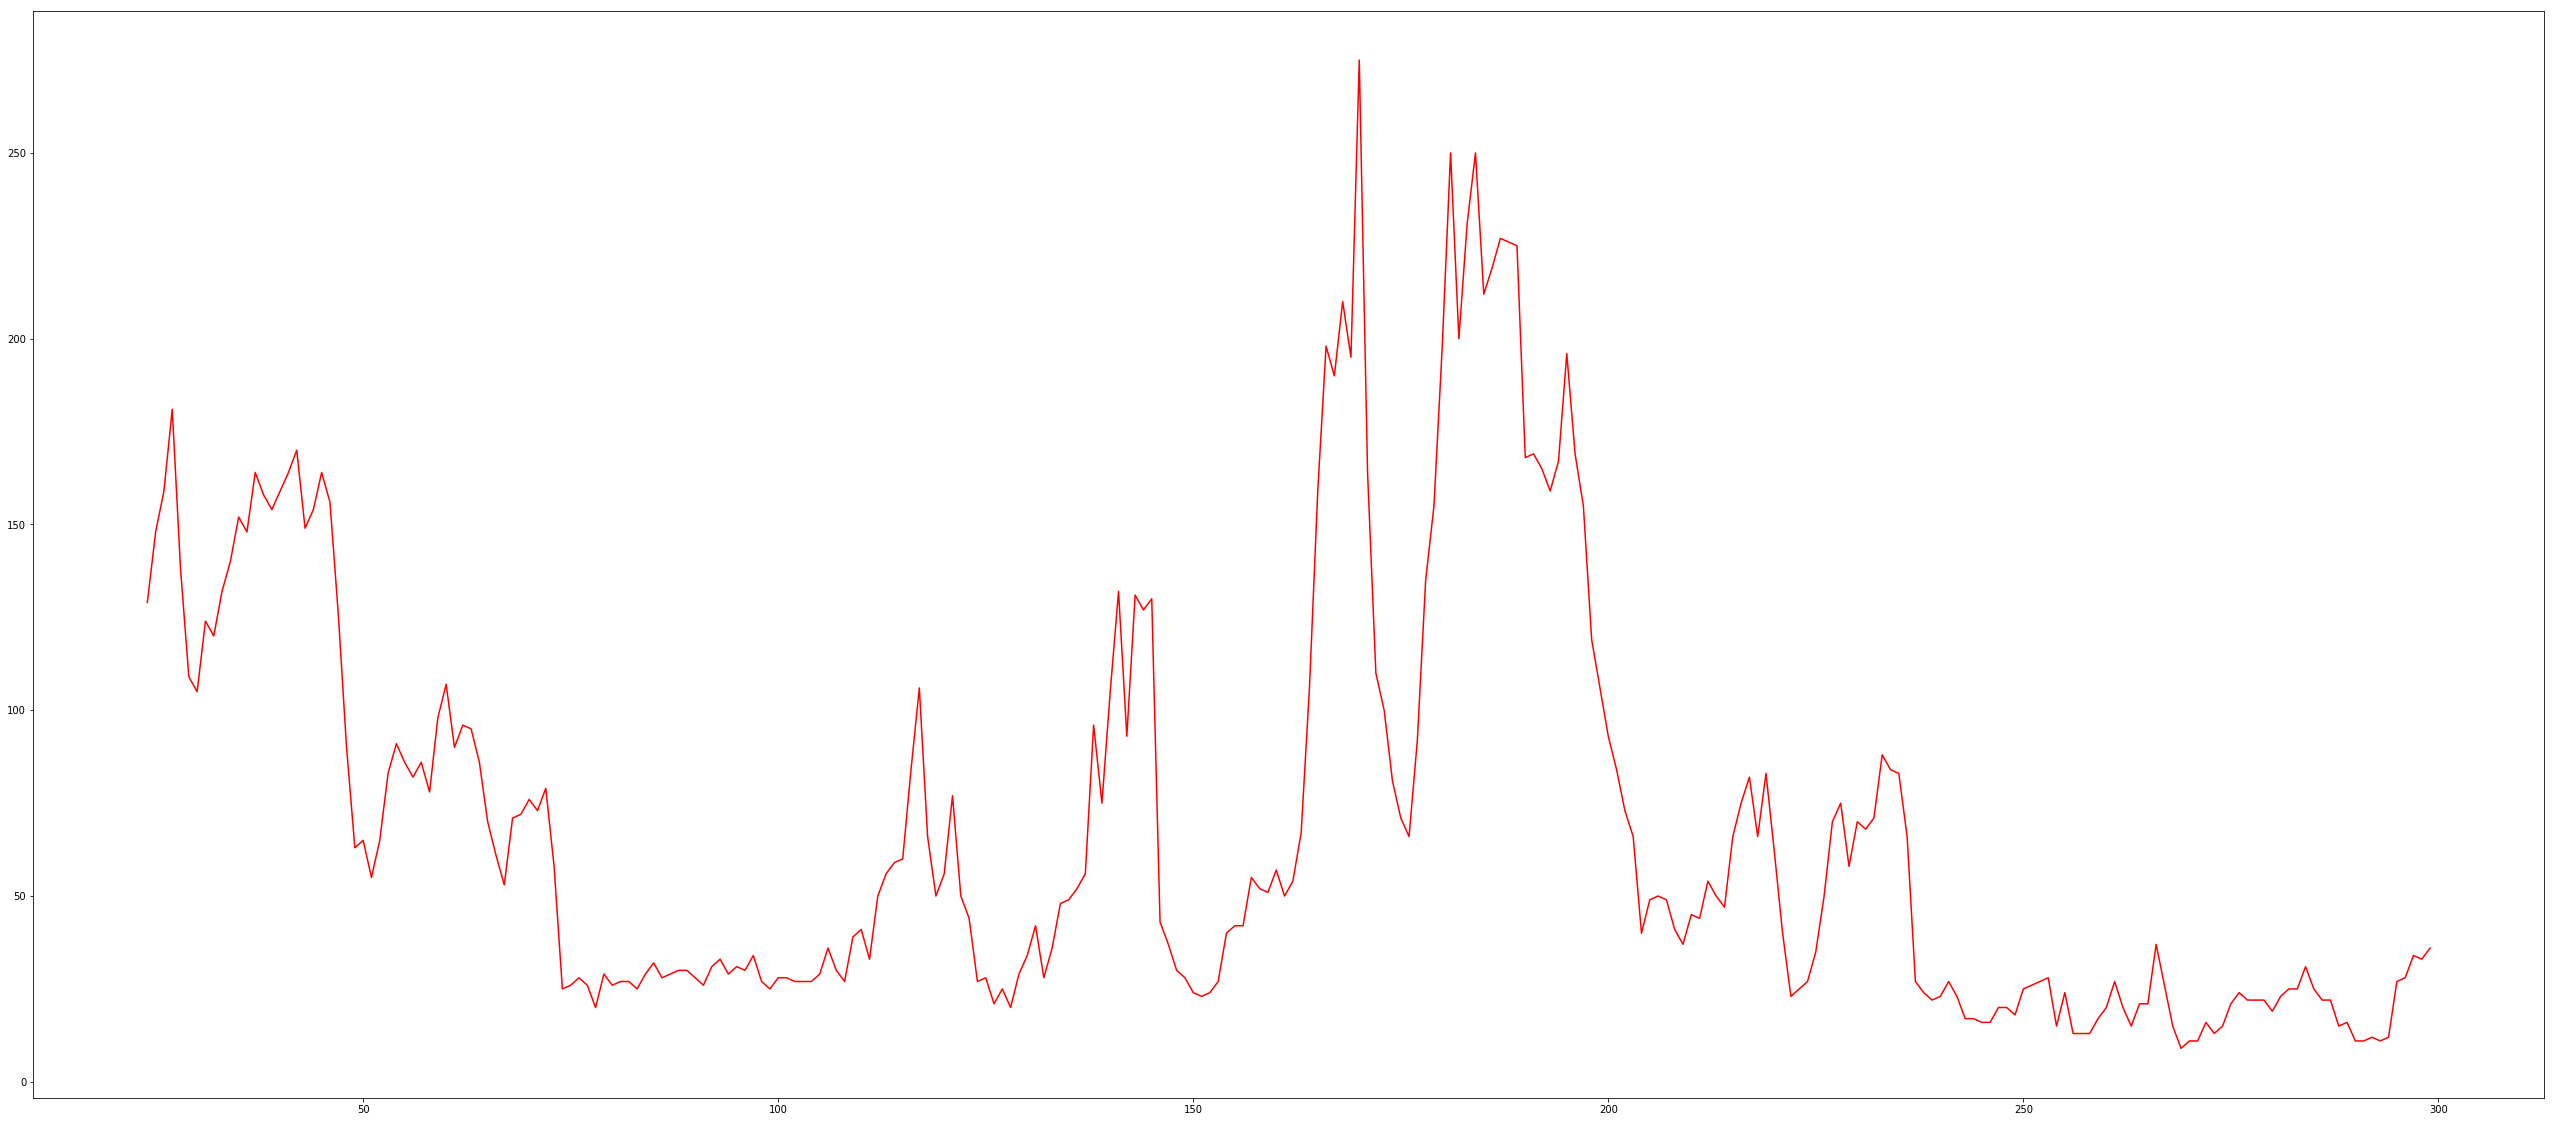

In [3]:
for i in range(1,2):
    v=df['pm2.5'].values[(300*i)-300:300*i]
    plt.figure(figsize=(45,20),edgecolor='r')
    plt.plot(v,color='r')
    plt.show()

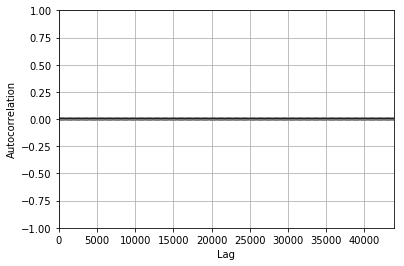

In [4]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['pm2.5'])
plt.show()

In [5]:
df['day_month_year_hour'] = pd.to_datetime(df.day_month_year_hour , format = '%d %m %Y %H')
data = df.drop(['day_month_year_hour'], axis=1)
data.index = df.day_month_year_hour
data = data.drop(['No'],axis=1)

In [6]:
le =preprocessing.LabelEncoder()
data['cbwd'] = le.fit_transform(data['cbwd'])

In [7]:
data = data.fillna(method='backfill')

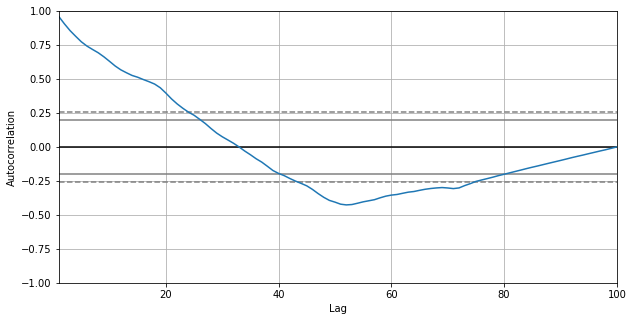

In [8]:
plt.figure(figsize=(10,5))
autocorrelation_plot(data['pm2.5'].values[:100])
plt.show()

In [89]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

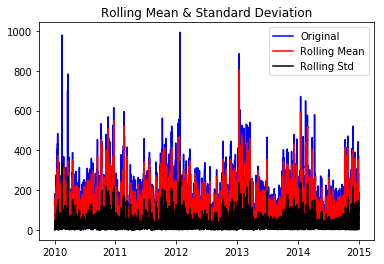

Results of Dickey-Fuller Test:
Test Statistic                   -20.994474
p-value                            0.000000
#Lags Used                        54.000000
Number of Observations Used    43769.000000
Critical Value (1%)               -3.430499
Critical Value (5%)               -2.861606
Critical Value (10%)              -2.566805
dtype: float64


In [26]:
test_stationarity(data['pm2.5'])

In [95]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(data[['pm2.5','Ir']],1,verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.3655 , p=0.0000  , df_denom=43820, df_num=1
ssr based chi2 test:   chi2=28.3674 , p=0.0000  , df=1
likelihood ratio test: chi2=28.3582 , p=0.0000  , df=1
parameter F test:         F=28.3655 , p=0.0000  , df_denom=43820, df_num=1


{1: ({'ssr_ftest': (28.365467753361735, 1.0093518320387918e-07, 43820.0, 1),
   'ssr_chi2test': (28.367409706882047, 1.0034035131668342e-07, 1),
   'lrtest': (28.358232302009128, 1.0081716348255826e-07, 1),
   'params_ftest': (28.36546775335301, 1.0093518320437618e-07, 43820.0, 1.0)},
   array([[0., 1., 0.]])])}

In [9]:
data.dtypes

pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd       int64
Iws      float64
Is         int64
Ir         int64
dtype: object

In [10]:
data = data.drop(['cbwd','Iws','Ir'],axis=1)
data

,pm2.5,DEWP,TEMP,PRES,Is
day_month_year_hour,,,,,
2010-01-01 00:00:00,129.0,-21,-11.0,1021.0,0
2010-01-01 01:00:00,129.0,-21,-12.0,1020.0,0
2010-01-01 02:00:00,129.0,-21,-11.0,1019.0,0
2010-01-01 03:00:00,129.0,-21,-14.0,1019.0,0
2010-01-01 04:00:00,129.0,-20,-12.0,1018.0,0
2010-01-01 05:00:00,129.0,-19,-10.0,1017.0,0
2010-01-01 06:00:00,129.0,-19,-9.0,1017.0,0
2010-01-01 07:00:00,129.0,-19,-9.0,1017.0,0
2010-01-01 08:00:00,129.0,-19,-9.0,1017.0,0


In [12]:
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
#from statsmodels.tsa.arima_model as arima,

model = VAR(endog=train)
model_fit = model.fit(maxlags=2)

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [13]:
#converting predictions to dataframe
cols = data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(5):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [14]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for pm2.5 is :  93.9036478592135
rmse value for DEWP is :  13.502242601447158
rmse value for TEMP is :  11.257745404205204
rmse value for PRES is :  9.419423850335573
rmse value for Is is :  0.7047544245104123
